In [1]:
#Import the Pandas library
import pandas as pd
#Read the provided CSV file ‘data.csv’.
data = pd.read_csv('data.csv')
data.head()

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0


In [3]:
#2.Show the basic statistical description about the data.
description = data.describe()
print(description)

         Duration       Pulse    Maxpulse     Calories
count  169.000000  169.000000  169.000000   164.000000
mean    63.846154  107.461538  134.047337   375.790244
std     42.299949   14.510259   16.450434   266.379919
min     15.000000   80.000000  100.000000    50.300000
25%     45.000000  100.000000  124.000000   250.925000
50%     60.000000  105.000000  131.000000   318.600000
75%     60.000000  111.000000  141.000000   387.600000
max    300.000000  159.000000  184.000000  1860.400000


In [4]:
#3. Check if the data has null values.
null_values = data.isnull()
any_null = null_values.any()
print(any_null)

Duration    False
Pulse       False
Maxpulse    False
Calories     True
dtype: bool


In [5]:
#a. Replace the null values with the mean
data.fillna(data.mean())
data.isnull().any()

Duration    False
Pulse       False
Maxpulse    False
Calories     True
dtype: bool

In [6]:
#Select at least two columns and aggregate the data using: min, max, count, mean.
# Select two columns
selected_columns = data[['Maxpulse', 'Calories']]

# Aggregate the data
aggregated_data = selected_columns.agg(['min', 'max', 'count', 'mean'])

print(aggregated_data)

         Maxpulse     Calories
min    100.000000    50.300000
max    184.000000  1860.400000
count  169.000000   164.000000
mean   134.047337   375.790244


In [7]:
#5. Filter the dataframe to select the rows with calories values between 500 and 1000.
# Filter rows with calories between 500 and 1000
filtered_data = data[(data['Calories'] >= 500) & (data['Calories'] <= 1000)]

print(filtered_data)

     Duration  Pulse  Maxpulse  Calories
51         80    123       146     643.1
62        160    109       135     853.0
65        180     90       130     800.4
66        150    105       135     873.4
67        150    107       130     816.0
72         90    100       127     700.0
73        150     97       127     953.2
75         90     98       125     563.2
78        120    100       130     500.4
83        120    100       130     500.0
90        180    101       127     600.1
99         90     93       124     604.1
101        90     90       110     500.0
102        90     90       100     500.0
103        90     90       100     500.4
106       180     90       120     800.3
108        90     90       120     500.3


In [8]:
#6. Filter the dataframe to select the rows with calories values > 500 and pulse < 100.
filtered_output = data[(data['Calories'] > 500) & (data['Pulse'] < 100)]
print(filtered_output)

     Duration  Pulse  Maxpulse  Calories
65        180     90       130     800.4
70        150     97       129    1115.0
73        150     97       127     953.2
75         90     98       125     563.2
99         90     93       124     604.1
103        90     90       100     500.4
106       180     90       120     800.3
108        90     90       120     500.3


In [9]:
#7. Create a new “df_modified” dataframe that contains all the columns from df except for “Maxpulse”.
df_modified = data.drop('Maxpulse', axis=1)
print(df_modified.head())

   Duration  Pulse  Calories
0        60    110     409.1
1        60    117     479.0
2        60    103     340.0
3        45    109     282.4
4        45    117     406.0


In [11]:
data = data.drop(columns=['Maxpulse'])

print(data)

     Duration  Pulse  Calories
0          60    110     409.1
1          60    117     479.0
2          60    103     340.0
3          45    109     282.4
4          45    117     406.0
..        ...    ...       ...
164        60    105     290.8
165        60    110     300.0
166        60    115     310.2
167        75    120     320.4
168        75    125     330.4

[169 rows x 3 columns]


In [19]:
import numpy as np
data['Calories'] = data['Calories'].fillna(0).astype(np.int64)
print(data.dtypes)

Duration    int64
Pulse       int64
Calories    int64
dtype: object


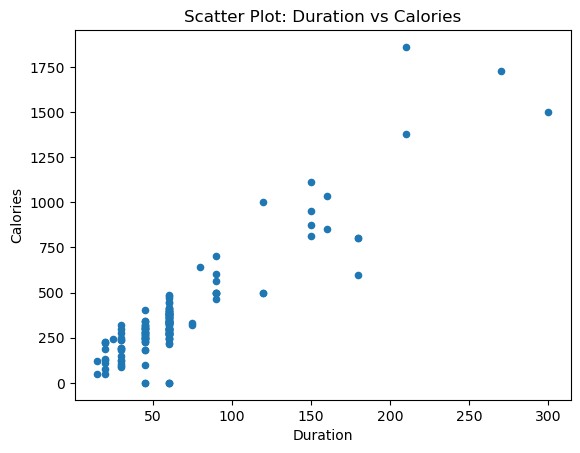

In [21]:
#10. Using pandas create a scatter plot for the two columns (Duration and Calories). 
import matplotlib.pyplot as plt
# Create scatter plot for 'Duration' vs 'Calories'
data.plot.scatter(x='Duration', y='Calories')

# Set plot title and labels
plt.title('Scatter Plot: Duration vs Calories')
plt.xlabel('Duration')
plt.ylabel('Calories')

# Display the plot
plt.show()

In [26]:
# Scikit-learn 

#1. Implement Naïve Bayes method using scikit-learn library. 
#a. Use the glass dataset available in Link also provided in your assignment. 
#b. Use train_test_split to create training and testing part. 

import pandas as pd
from sklearn.model_selection import train_test_split

# Load the glass dataset into a Pandas DataFrame
data = pd.read_csv('glass.csv', header=None)

# Split the data into features (X) and target variable (y)
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (172, 9) (172,)
Testing set shape: (43, 9) (43,)


In [30]:
#2. Evaluate the model on testing part using score and 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Load the glass dataset into a Pandas DataFrame, excluding the first column
data = pd.read_csv('glass.csv')

# Split the data into features (X) and target variable (y)
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of the Naïve Bayes classifier
model = GaussianNB()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model's accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy)

# Print the classification report
classification_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_report)


Accuracy Score: 0.5581395348837209
Classification Report:
              precision    recall  f1-score   support

           1       0.41      0.64      0.50        11
           2       0.43      0.21      0.29        14
           3       0.40      0.67      0.50         3
           5       0.50      0.25      0.33         4
           6       1.00      1.00      1.00         3
           7       0.89      1.00      0.94         8

    accuracy                           0.56        43
   macro avg       0.60      0.63      0.59        43
weighted avg       0.55      0.56      0.53        43



In [40]:
#Implement linear SVM method using scikit library 
#a. Use the glass dataset available in Link also provided in your assignment. b. Use train_test_split to create training and testing part. 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report

# Split the data into features (X) and target variable (y)
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of the Linear SVM classifier
model = SVC(kernel='linear')

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model's accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy)

# Print the classification report
classification_report_result = classification_report(y_test, y_pred, zero_division=1)
print("Classification Report:")
print(classification_report_result)


Accuracy Score: 0.7441860465116279
Classification Report:
              precision    recall  f1-score   support

           1       0.69      0.82      0.75        11
           2       0.67      0.71      0.69        14
           3       1.00      0.00      0.00         3
           5       0.80      1.00      0.89         4
           6       1.00      0.67      0.80         3
           7       0.88      0.88      0.88         8

    accuracy                           0.74        43
   macro avg       0.84      0.68      0.67        43
weighted avg       0.77      0.74      0.72        43



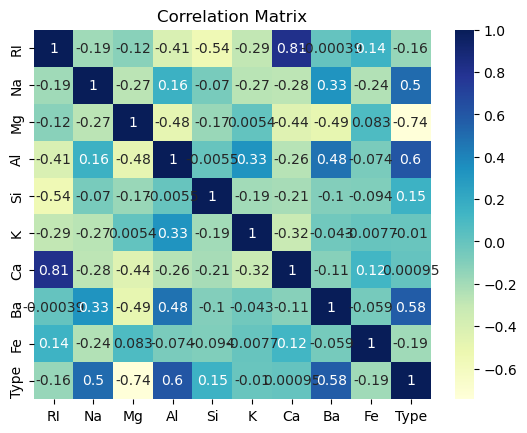

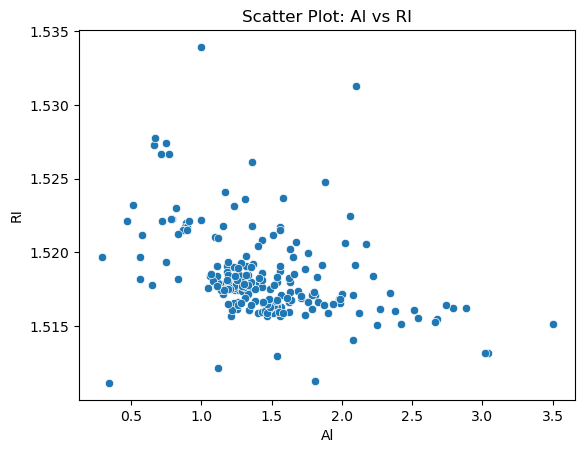

In [41]:
#visualizations to describe or show correlations in the Glass Dataset. 
# Plotting correlation matrix
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu")
plt.title("Correlation Matrix")
plt.show()

# Plotting scatter plot of two variables
sns.scatterplot(x="Al", y="RI", data=data)
plt.title("Scatter Plot: Al vs RI")
plt.xlabel("Al")
plt.ylabel("RI")
plt.show()
